In [6]:
import pandas as pd
import numpy as np
from os import path

## Importing Data

In [12]:
df = pd.read_csv('MaunaLoaDailyTemps.csv', parse_dates=True, index_col=0)
df = df.dropna()
print("Shape :", df.shape)
df.head()

Shape : (1821, 5)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot:xlabel='DATE'>

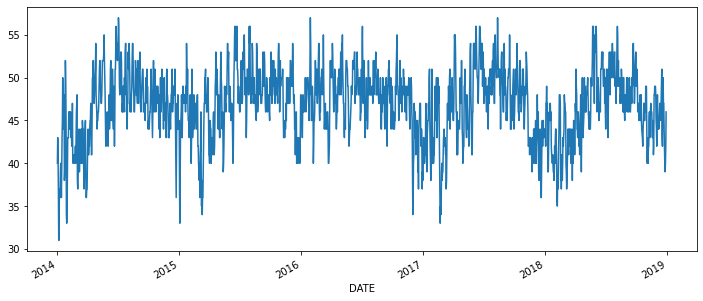

In [13]:
df['AvgTemp'].plot(figsize=(12, 5))

## Correlation Plots 

/opt/homebrew/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


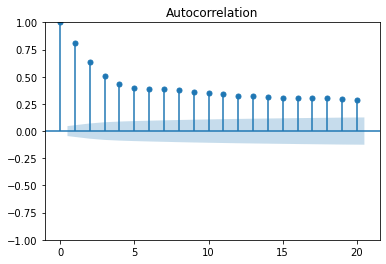

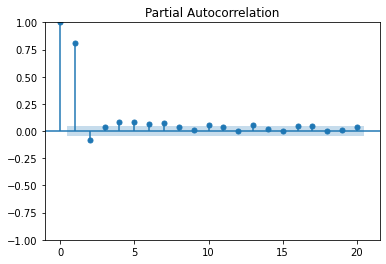

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf = plot_acf(df['AvgTemp'], lags=20)
plot_pacf = plot_pacf(df['AvgTemp'], lags=20)

## Check for Seasonality

In [19]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    results = adfuller(dataset, autolag='AIC')
    print("1. ADF :", results[0])
    print("2. P value :", results[1])
    print("3. Num of lags :", results[2])
    print("4. Num of Observations used for ADF regression and Critical value calculation", results[3])
    print("5. Critical values :")
    for key, val in results[4].items():
        print("\t", key, ":", val)
adf_test(df['AvgTemp'])

1. ADF : -6.554680125068776
2. P value : 8.67593748019975e-09
3. Num of lags : 12
4. Num of Observations used for ADF regression and Critical value calculation 1808
5. Critical values :
	 1% : -3.433972018026501
	 5% : -2.8631399192826676
	 10% : -2.5676217442756872


In [22]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8343.904, Time=0.59 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.40 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=0.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.320, Time=0.63 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8316.795, Time=0.61 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.190, Time=0.60 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8309.970, Time=0.75 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.014, Time=0.78 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.579, Time=0.91 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8304.993, Time=0.86 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

## Train Test Split 

In [26]:
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(1791, 5) (30, 5)


## ARIMA Model

### arima_model changed to arima.model

In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['AvgTemp'], order=(1,0,5)).fit()
print(model.summary())

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 11 Mar 2022   AIC                           8156.395
Time:                        10:31:11   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.0

## Prediction of ARIMA Model

In [38]:
test.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:xlabel='DATE'>

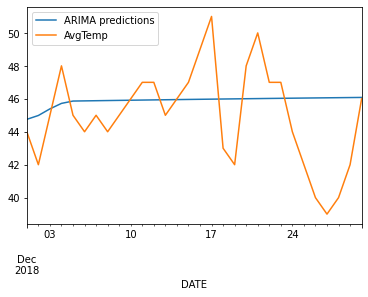

In [40]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.index=index_future_dates # proper prediction index is necessary
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

## Error Metrics

In [42]:
from math import sqrt
from sklearn.metrics import mean_squared_error

pred_error = sqrt(mean_squared_error(test['AvgTemp'], pred))
print("RMSE :", pred_error)
print("Mean :", test['AvgTemp'].mean())

RMSE : 3.000463769240903
Mean : 45.0


## Predictions on future Dates

### Setting the indices for the future dates is important


In [51]:
model2 = ARIMA(df['AvgTemp'], order=(1,0,5)).fit()
df.tail()

/opt/homebrew/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [54]:
future_index_dates = pd.date_range(start= '2018-12-30', end='2019-1-29')
pred = model2.predict(start=len(df), end=len(df)+30, typ='levels').rename('ARIMA Predictions')
pred.index = future_index_dates
print(pred[:5])


2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot:>

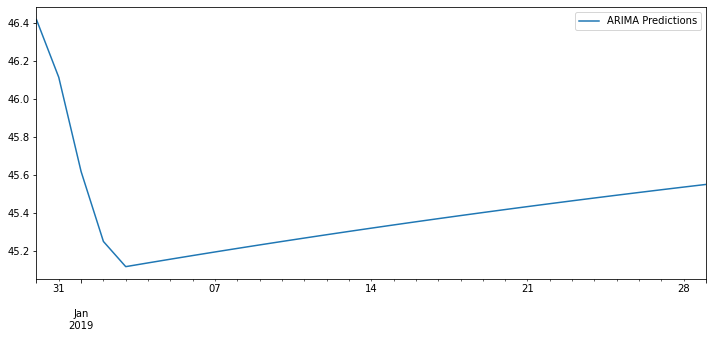

In [57]:
pred.plot(figsize=(12,5), legend=True)